<a href="https://colab.research.google.com/github/LIAO-JIAN-PENG/python_lecture/blob/main/%E7%88%AC%E8%9F%B2%E6%95%99%E5%AD%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 套件引入
使用 import 來引入任何套件
* requests : 負責跟伺服器要資料
* BeautifulSoup : 負責解析網站

> 寫notebook小技巧: 
  * `Shift+Enter` 執行一個小框框(等於點左上角的數字or播放鍵)
  * `tab` 至少要打3個字元，如果是打字怕打錯或者是打太慢，可以按tab幫你完成剩下的字

In [ ]:
import requests
from bs4 import BeautifulSoup

# 準備跟伺服器請求(使用 Requests)
1. 取得目標網址
2. 宣告一個變數去記住這次的請求結果(我們要到的資料)
3. 印出來，查看這次的請求是否成功

> * GET method : 只拿不傳
> * POST method : 回傳回資料給伺服器


In [ ]:
# url (Uniform Resource Locator) 就是網址
url = "https://www.taiwan.net.tw/m1.aspx?sNo=0001121" # 放入目標網址

# 紀錄請求結果
# 我們將用到 get 函式跟伺服器 "get" 資料
res = requests.get(url)

# 印出狀態 200 表示成功
print(res)
print(res.text)

## Chrome 的開發人員工具
* 快速鍵 : 打開Chrome後按 `f12`
* Network : 查看瀏覽器看到的資料
* Headers : 紀錄網路連線的狀況
  * URL : 連線上的網址
  * Request Method : 跟伺服器請求的方法
  * Status Code : 連線的狀況
    - 2XX 開頭成功回覆
    - 3XX 檔案可能被重新導向
    - 4XX 發生錯誤
    - 500 伺服器發生錯誤 internal server error
    - 503 service unavailable

> 如果打開沒看到東西，那別關開發人員工具，`f5` 重載

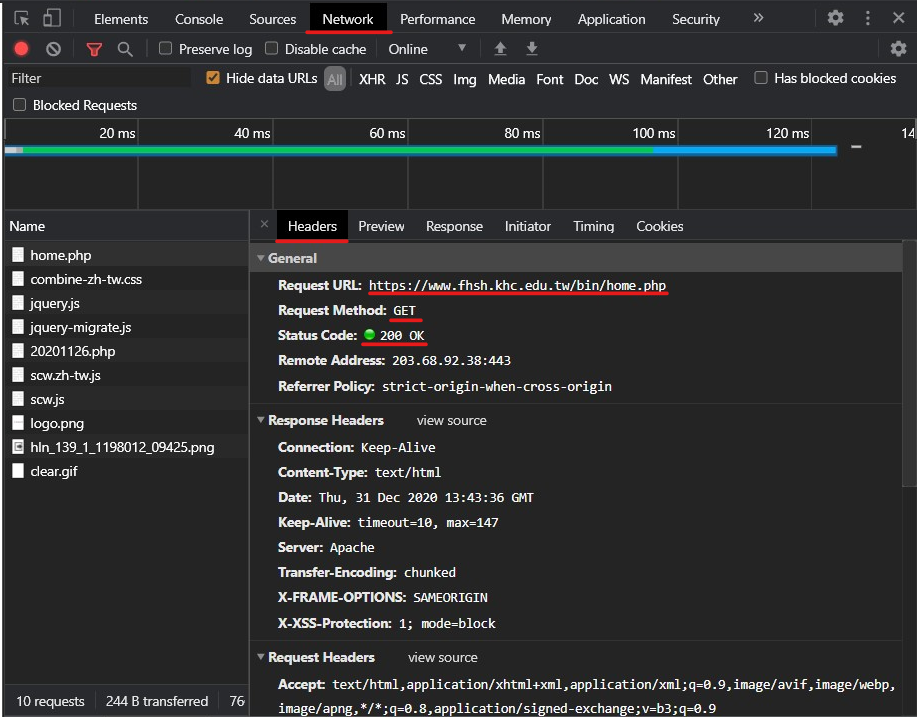

## 開始看我拿到的東西
* 使用 `.text` 把 res 中的 html 文字取出
* 緊接著就可以爬取我們想要的東西

In [ ]:
# 來看看我們這次的請求
# 可以看到 html
print(res.text)

# 解析網頁(BeautifulSoup)
* BeautifulSoup( 要解析的內容, 解析方法 )
* 然後，我們就會使用 `.find()`, `.find_all()`篩選出我們想要的結果
* 緊接著，我們需要把我們篩選後的資料存取下來

> * .find() : 只篩選第一個符合其條件的段落
> * .find_all() : 對所有篩選有符合其條件的段落 

> * .find(tag='a') : 符合 tag (ex: \<a\>, \<img\>) 的部分
> * .find(tag='div', class_='special') : 符合 tag 且符合 class

## 我們要篩選字卡上的內容
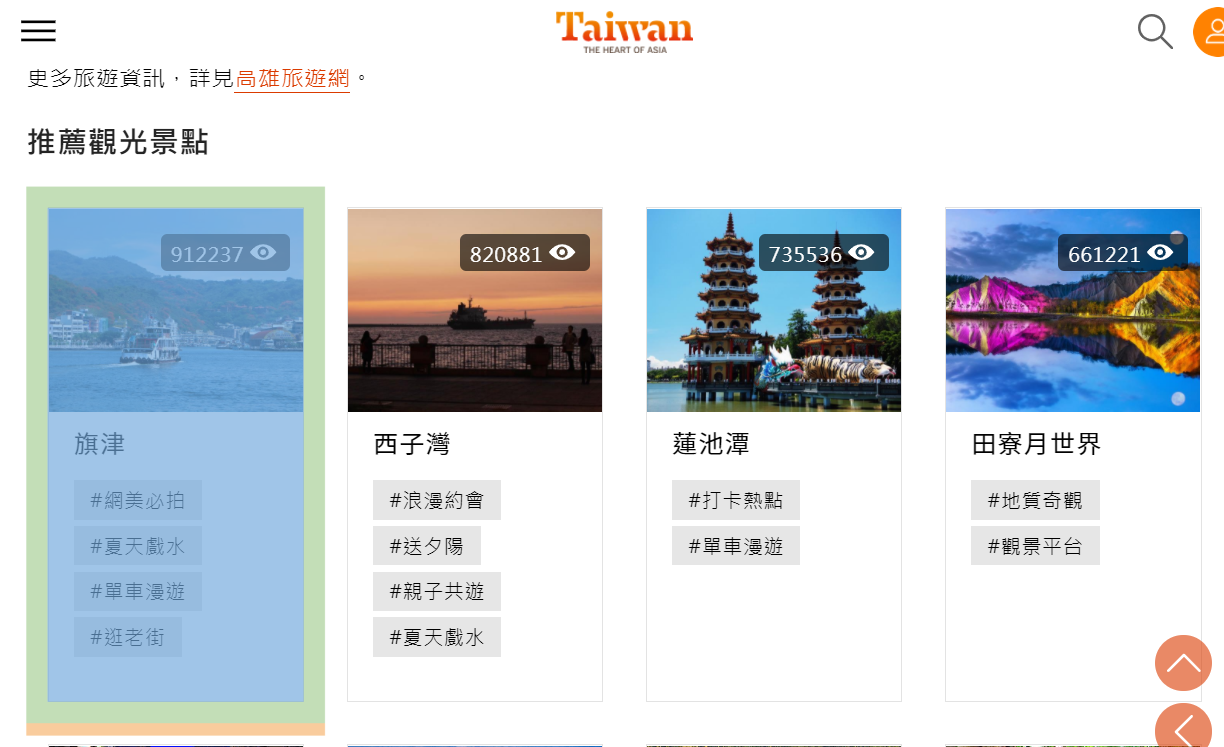

In [ ]:
# make a soup 組成一個可供程式篩選的樹狀結構
## res.text 必須提供的是 html 的文字
## 使用 html.parser 方式
soup = BeautifulSoup(res.text, 'html.parser')

# 篩選出 tag='div', class='card'
cards = soup.find_all('div', 'card')

# 因為是notebook的關係，所以在程式尾端放變數可以直接印出來
# 印出前 5 項蒐集到的結果
cards[:5]

[<div class="card"><div class="card-wrap"><a class="card-link" href="m1.aspx?sNo=0001121&amp;id=A12-00075" title="旗津"><figure><div class="graphic"><img alt="旗津" class="lazyload" data-src="https://www.taiwan.net.tw/pic.ashx?qp=1/big_scenic_spots/pic_A12-00075_12.jpg&amp;sizetype=2"/> <noscript><img alt="旗津" class="noscriptImg" src="https://www.taiwan.net.tw/pic.ashx?qp=1/big_scenic_spots/pic_A12-00075_12.jpg&amp;sizetype=2"/></noscript></div></figure></a><div class="card-info"><div class="card-title">旗津</div><div class="hashtag"><a href="m1.aspx?sNo=0000193&amp;id=43" title="#網美必拍">#網美必拍</a><a href="m1.aspx?sNo=0000193&amp;id=20" title="#夏天戲水">#夏天戲水</a><a href="m1.aspx?sNo=0000193&amp;id=26" title="#單車漫遊">#單車漫遊</a><a href="m1.aspx?sNo=0000193&amp;id=41" title="#逛老街">#逛老街</a></div></div><p class="target target-like"><span class="sr-only">瀏覽人次：</span>918045</p></div></div>,
 <div class="card"><div class="card-wrap"><a class="card-link" href="m1.aspx?sNo=0001121&amp;id=624" title="西子灣"><fi

## 我們再篩得更細
### cards 資料
```htmlembedded=
<div class="card">
  <div class="card-wrap">
    <a class="card-link" href="m1.aspx?sNo=0001121&amp;id=A12-00075" title="旗津">
      <figure>
        <div class="graphic">
          <img alt="旗津" class="lazyload" data-src="https://www.taiwan.net.tw/pic.ashx?qp=1/big_scenic_spots/pic_A12-00075_12.jpg&amp;sizetype=2"/> 
          <noscript>
            <img alt="旗津" class="noscriptImg" src="https://www.taiwan.net.tw/pic.ashx?qp=1/big_scenic_spots/pic_A12-00075_12.jpg&amp;sizetype=2"/>
          </noscript>
        </div>
      </figure>
    </a>
    <div class="card-info">
      <div class="card-title">旗津</div>
      <div class="hashtag">
        <a href="m1.aspx?sNo=0000193&amp;id=43" title="#網美必拍">#網美必拍</a>
        <a href="m1.aspx?sNo=0000193&amp;id=20" title="#夏天戲水">#夏天戲水</a>
        <a href="m1.aspx?sNo=0000193&amp;id=26" title="#單車漫遊">#單車漫遊</a>
        <a href="m1.aspx?sNo=0000193&amp;id=41" title="#逛老街">#逛老街</a>
      </div>
    </div>
    <p class="target target-like">
      <span class="sr-only">瀏覽人次：</span>
      912237
    </p>
  </div>
</div>
```

* 我們把 card 當作我們新的 soup 對它再做一次篩選

In [ ]:
# 字卡上面有 title, image, hashtag, target瀏覽人數
titles = []
imgs = []
hashtags = []
visitors = []

# cards 是一個裝著剛剛篩選過字卡的文字
# 以下，我們將再一次篩選出更細節的資料

for card in cards:
  title = card.find('div', 'card-title')
  img = card.find('img')
  h_tag = card.find('div', 'hashtag')
  visitor = card.find('p', 'target')
  
  # 將我們得到的資料一個一個放在我們宣告好的 list
  # .append() : 放在 list 的尾端
  titles.append(title)
  imgs.append(img)
  hashtags.append(h_tag)
  visitors.append(visitor)

## 顯示結果

In [ ]:
for i in range(len(titles)):
  print('地點 :', titles[i].text)
  print('照片 :', imgs[i]['data-src'])
  print('hashtag :', hashtags[i].text)
  print(visitors[i].text)
  print('-'*100)

地點 : 旗津
照片 : https://www.taiwan.net.tw/pic.ashx?qp=1/big_scenic_spots/pic_A12-00075_12.jpg&sizetype=2
hashtag : #網美必拍#夏天戲水#單車漫遊#逛老街
瀏覽人次：918045
----------------------------------------------------------------------------------------------------
地點 : 西子灣
照片 : https://www.taiwan.net.tw/pic.ashx?qp=1/big_scenic_spots/pic_624_16.jpg&sizetype=2
hashtag : #浪漫約會#送夕陽#親子共遊#夏天戲水
瀏覽人次：825558
----------------------------------------------------------------------------------------------------
地點 : 蓮池潭
照片 : https://www.taiwan.net.tw/pic.ashx?qp=1/big_scenic_spots/pic_2149_20.jpg&sizetype=2
hashtag : #打卡熱點#單車漫遊
瀏覽人次：742757
----------------------------------------------------------------------------------------------------
地點 : 田寮月世界
照片 : https://www.taiwan.net.tw/pic.ashx?qp=1/big_scenic_spots/pic_631_9.jpg&sizetype=2
hashtag : #地質奇觀#觀景平台
瀏覽人次：669288
----------------------------------------------------------------------------------------------------
地點 : 六合觀光夜市
照片 : https://www.taiwan.net.tw/pic.ashx

# 進階: 下載圖片
* 首先: 需要使用 google drive 的權限
  * 跟你的 google drive 作連動
  * 路徑: '/content/drive/' 往下會有 '/Mydrive' 是你的雲端空間
* 我們照片會以二進位的方式儲存
  * 我們也是用 requests.get 的方式下載
* 寫入檔案
  * 'wb': write + binary (以二進為寫入)'

```python=
# file 是你叫那個檔案的稱呼
with open('你要開啟的檔案位置') as file:
  file.write(寫入的東西)
```


In [ ]:
# 連結google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 把 imgs 中的網址字串萃取出來
links = [img['data-src'] for img in imgs]
names = [title.text for title in titles]

In [ ]:
import os
for link, name in zip(links, names):
  if not os.path.exists(r'/content/drive/MyDrive/Kaohsiung'):
    os.mkdir(r'/content/drive/MyDrive/Kaohsiung')
  
  # 以二進位方式儲存，但現在 img 本身現在是 <Response [200]>
  img = requests.get(link)

  with open(r'/content/drive/MyDrive/Kaohsiung/'+name+'.jpg', 'wb') as file:
    file.write(img.content)
  print(name+' 圖片下載成功')

# 結果發表
將以上程式碼精簡
* 簡報中的程式碼

In [ ]:
import requests
from bs4 import BeautifulSoup
import os

url = 'https://www.taiwan.net.tw/m1.aspx?sNo=0001121'
res = requests.get(url)
soup = BeautifulSoup(res.text, 'html.parser')
cards = soup.find_all('div', 'card')

# 更正，放這邊比較好
if not os.path.exists(r'/content/drive/MyDrive/Kaohsiung'):
    os.mkdir(r'/content/drive/MyDrive/Kaohsiung')

for card in cards:
  link = card.find('img')['data-src']
  name = card.find('div', 'card-title').text
  img = requests.get(url)
  with open(r'/content/drive/MyDrive/Kaohsiung/'+name+'.jpg', 'wb') as file:
    file.write(img.content)
    print(name+' 圖片下載成功')

旗津 圖片下載成功
西子灣 圖片下載成功
蓮池潭 圖片下載成功
田寮月世界 圖片下載成功
六合觀光夜市 圖片下載成功
愛河 圖片下載成功
澄清湖 圖片下載成功
壽山國家自然公園 圖片下載成功
打狗英國領事館 圖片下載成功
高雄85大樓（整修中） 圖片下載成功
愛河之心 圖片下載成功
茂林國家風景區-新威遊客中心 圖片下載成功
高雄港 圖片下載成功
佛光山 圖片下載成功
香蕉碼頭 圖片下載成功
高雄孔廟 圖片下載成功
壽山動物園 圖片下載成功
高雄農場 圖片下載成功
藤枝國家森林遊樂區 圖片下載成功
情人谷 圖片下載成功
光之穹頂 圖片下載成功
國立科學工藝博物館 圖片下載成功
寶來溫泉 圖片下載成功
高雄市立歷史博物館 圖片下載成功
高雄市立美術館 圖片下載成功
凹仔底森林公園 圖片下載成功
高雄美濃-美濃美意情濃 圖片下載成功
義大遊樂世界 圖片下載成功
城市光廊 圖片下載成功
瑞豐夜市 圖片下載成功
不老溫泉 圖片下載成功
興中觀光夜市 圖片下載成功
扇平森林生態科學園 圖片下載成功
高雄燈塔（旗后燈塔） 圖片下載成功
原生植物園 圖片下載成功
衛武營國家藝術文化中心 圖片下載成功
光榮碼頭 圖片下載成功
金獅湖 圖片下載成功
天主教玫瑰堂 圖片下載成功
洲仔溼地公園 圖片下載成功
十八羅漢山 圖片下載成功
高雄巨蛋 圖片下載成功
玉山國家公園-梅山遊客中心 圖片下載成功
光華觀光夜市 圖片下載成功
元亨寺 圖片下載成功
高雄都會公園 圖片下載成功
援中港濕地公園 圖片下載成功
半屏湖濕地公園 圖片下載成功
高雄市電影館 圖片下載成功
新客家文化園區 圖片下載成功
忠孝觀光夜市 圖片下載成功
駁二藝術特區 圖片下載成功
高雄市天文教育館 圖片下載成功
高雄市立文化中心 圖片下載成功
佛光山佛陀紀念館 圖片下載成功
高雄市音樂館 圖片下載成功
紅毛港文化園區 圖片下載成功
再見捌捌陸-臺灣眷村文化園區 圖片下載成功
神威天臺山 圖片下載成功
寶來遊客服務區 圖片下載成功
美綠生態園區 圖片下載成功
美濃湖 圖片下載成功
美濃客家文物館 圖片下載成功
